In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

In [2]:
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1])

In [3]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [4]:
## converting dataframe into numpy array
df = dataset.values

In [5]:
## changing the datatype
dataset = df.astype('float32')

In [6]:
## Scaling

scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [7]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [8]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
## model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 3s - loss: 0.0363 - 3s/epoch - 29ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0172 - 195ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0129 - 209ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0120 - 198ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0112 - 179ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0103 - 207ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0094 - 185ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0085 - 176ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0076 - 204ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0067 - 194ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0060 - 179ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0051 - 183ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0044 - 215ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0037 - 173ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0033 - 226ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0029 - 396ms/epoc

2/2 [==============================] - 0s 10ms/step


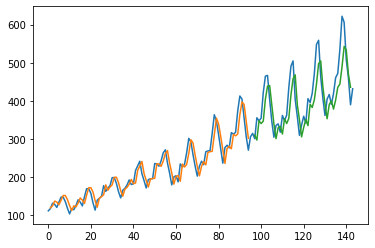

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()